# *Лабораторная работа №1*

## Построение бинарного классификатора

###Задание базового уровня

Произвести очистку датасета от поврежденных значений и шума. На основе очищенного датасета построить бинарный классификатор для определения пола человека, пользующегося смартфоном. **Даже при использовании собственных метрик в процессе обучения. Итоговая оценка должна производиться по метрике *Accuracy*.**

Данное задание основано на данном датасете с kaggle (https://www.kaggle.com/pwang001/user-package-information-of-mobile-operators).

## Загрузка датасета в память

На данный момент датасте разделен на 4 части. Возможны два сценария работы с ним:

1. Объединить два фрагмента с меткой train в тренировочныйц набор, а фрагменты с меткой test - в тестовый.

2. Объединить все четыре фрагмента в единый датасет, затем провести разделение на тренировочный и тестовый наборы с помощью функции train_test_split с **нефиксированным сидом рандома**.

In [ ]:
%%capture
!wget https://www.dropbox.com/s/5b6o99k5ko6cr1r/train_1.csv
!wget https://www.dropbox.com/s/br8m56fomdxs7lw/train_2.csv
!wget https://www.dropbox.com/s/xmw5shslewwfi0n/test_1.csv
!wget https://www.dropbox.com/s/uxxc48au1zclpu2/test_2.csv

Загрузим данные в DataFrame и обеденим train_1 c train_2, test_1 c test_2

In [ ]:
import pandas as pd
df_train_1 = pd.read_csv('train_1.csv')
df_train_2 = pd.read_csv('train_2.csv')
df_test_1 = pd.read_csv('test_1.csv')
df_test_2 = pd.read_csv('test_2.csv')

<ipython-input-2-1e057e877f1f>:2: DtypeWarning: Columns (4,5,20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train_1 = pd.read_csv('train_1.csv')
<ipython-input-2-1e057e877f1f>:3: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train_2 = pd.read_csv('train_2.csv')
<ipython-input-2-1e057e877f1f>:4: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df_test_1 = pd.read_csv('test_1.csv')
<ipython-input-2-1e057e877f1f>:5: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df_test_2 = pd.read_csv('test_2.csv')


In [ ]:
df_train_1

In [ ]:
df_train_1.info()

In [ ]:
df_train_2

In [ ]:
df_train_2.info()

In [ ]:
df_test_1

In [ ]:
df_test_1.info()

In [ ]:
df_test_2

In [ ]:
df_test_2.info()

In [ ]:
df

In [ ]:
df.info()

Как мы видем кололнка 'user_id' не несет никакой смысловой информации. А 'current_service' отсутствует в тестовом наборе данных. Поэтому просто удалим их из датафрема.

In [ ]:
df = pd.concat([df_train_1, df_train_2, df_test_1, df_test_2], axis=0).reset_index().drop('index', axis=1)
df = df.drop(['user_id', 'current_service'], axis=1)

In [ ]:
df

,service_type,is_mix_service,online_time,1_total_fee,2_total_fee,3_total_fee,4_total_fee,month_traffic,many_over_bill,contract_type,...,last_month_traffic,local_trafffic_month,local_caller_time,service1_caller_time,service2_caller_time,gender,age,complaint_level,former_complaint_num,former_complaint_fee
0,4,0,85,295.96,296.2,296.0,296.80,3813.614698,0,1,...,4096.000000,1392.038508,108.100000,0.000000,564.366667,1,31,0,0,0.0
1,1,0,10,265.20,261.2,208.5,174.50,0.000000,1,0,...,0.000000,62852.509718,240.100000,355.166667,0.000000,1,30,0,0,0.0
2,1,0,12,44.50,70.2,69.0,61.40,2598.397406,0,0,...,0.000000,1935.242104,27.666667,0.000000,98.416667,2,25,0,0,0.0
3,4,0,134,87.95,81.4,76.0,88.30,988.440563,0,0,...,37.336425,988.561075,89.900000,74.483333,121.833333,1,44,0,0,0.0
4,4,0,84,317.04,314.08,435.51,413.05,5885.800642,0,1,...,3305.741127,0.000000,0.000000,35.100000,496.733333,1,31,2,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1479206,1,0,16,75.50,48.8,43.0,42.40,0.000000,1,0,...,0.000000,2775.206189,177.433333,177.433333,0.000000,1,29,0,0,0.0
1479207,4,1,79,111.00,111.0,111.0,130.74,0.000000,0,1,...,0.000000,0.006212,231.566667,0.000000,309.733333,1,37,0,0,0.0
1479208,4,0,71,70.00,70.0,346.5,70.00,476.145350,0,0,...,23.222478,476.536292,10.850000,30.733333,79.100000,1,40,0,0,0.0
1479209,1,0,16,95.60,82.7,85.1,68.40,0.000000,1,0,...,0.000000,76023.116140,2.350000,0.000000,2.350000,1,23,0,0,0.0


In [ ]:
import seaborn as sns
import numpy as np
obj_col = df.select_dtypes(include='object').columns
print(obj_col[0])
for i in range(len(obj_col)):
  print(pd.unique(df[obj_col[i]]))
df[obj_col] = df[obj_col].replace('\\N', np.nan)

2_total_fee
[296.2 261.2 70.2 ... 337.74 1.57 464.73]
[296.0 208.5 69.0 ... 362.58 452.82 439.86]
[1 2 0 '2' '1' '0' '01' '02' '00' '\\N']
[31 30 25 44 42 27 40 43 22 0 29 56 17 24 36 26 49 35 28 33 46 21 19 39 18
 32 70 59 34 20 51 45 23 38 47 41 48 54 53 61 37 50 16 63 64 57 55 68 62
 60 65 52 74 66 73 58 69 67 77 15 71 72 76 82 75 83 85 80 14 81 86 87 84
 79 78 12 13 88 '48' '31' '30' '45' '34' '51' '18' '23' '38' '28' '27'
 '32' '0' '37' '26' '22' '16' '35' '42' '49' '19' '47' '21' '25' '41' '29'
 '36' '33' '20' '43' '50' '40' '24' '44' '39' '67' '56' '62' '17' '63'
 '66' '61' '52' '55' '54' '53' '58' '46' '70' '69' '68' '59' '65' '57'
 '60' '79' '72' '71' '73' '64' '74' '75' '77' '81' '\\N' '76' '78' '92'
 '80' '83' '84' '87' '82' '86' '15' 93 99 89 90 103 10 96 92 11 4 94 5 6
 91 9 7 95 139]


In [ ]:
df['gender'].value_counts()
df['gender'] = df['gender'].replace(0, np.nan)
df.dropna(inplace=True)
df['gender'] = df['gender'].astype('int64')
df['gender'] = df['gender'].replace(2, 0)
df.reset_index().drop('index', axis=1)

df['age'] = df['age'].astype('int64')
df[['2_total_fee', '3_total_fee']] = df[['2_total_fee', '3_total_fee']].astype('float64')
df[['2_total_fee', '3_total_fee']] = df[['2_total_fee', '3_total_fee']].astype('float64')

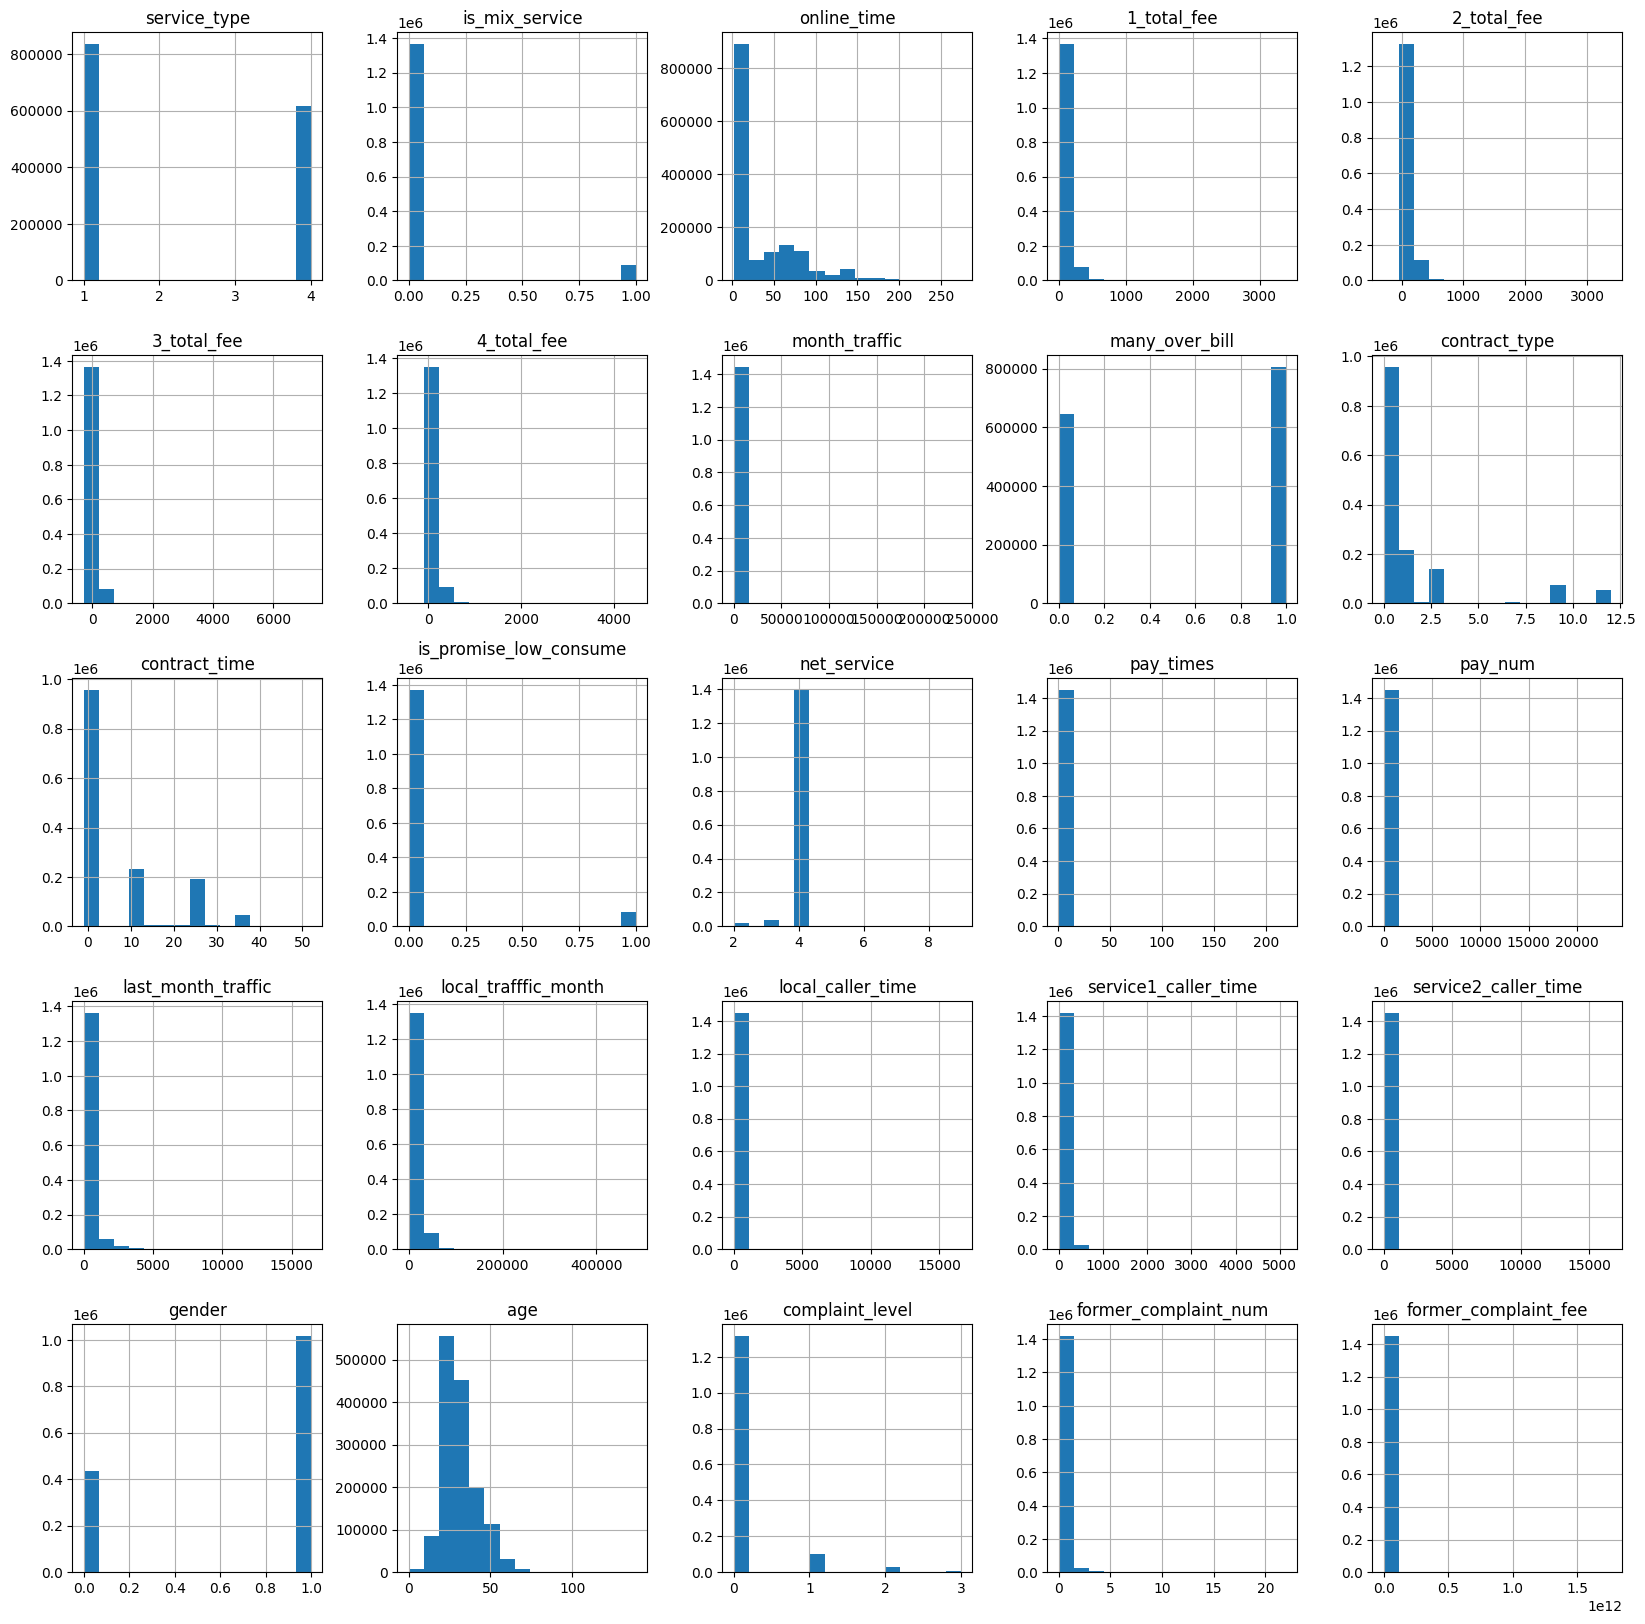

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
df.hist( figsize=[20, 20], bins=15)
plt.show()

In [ ]:
lim = np.abs((df - df.mean()) / df.std(ddof=0)) < 3
df = df.where(lim, np.nan)
df.dropna(inplace=True)

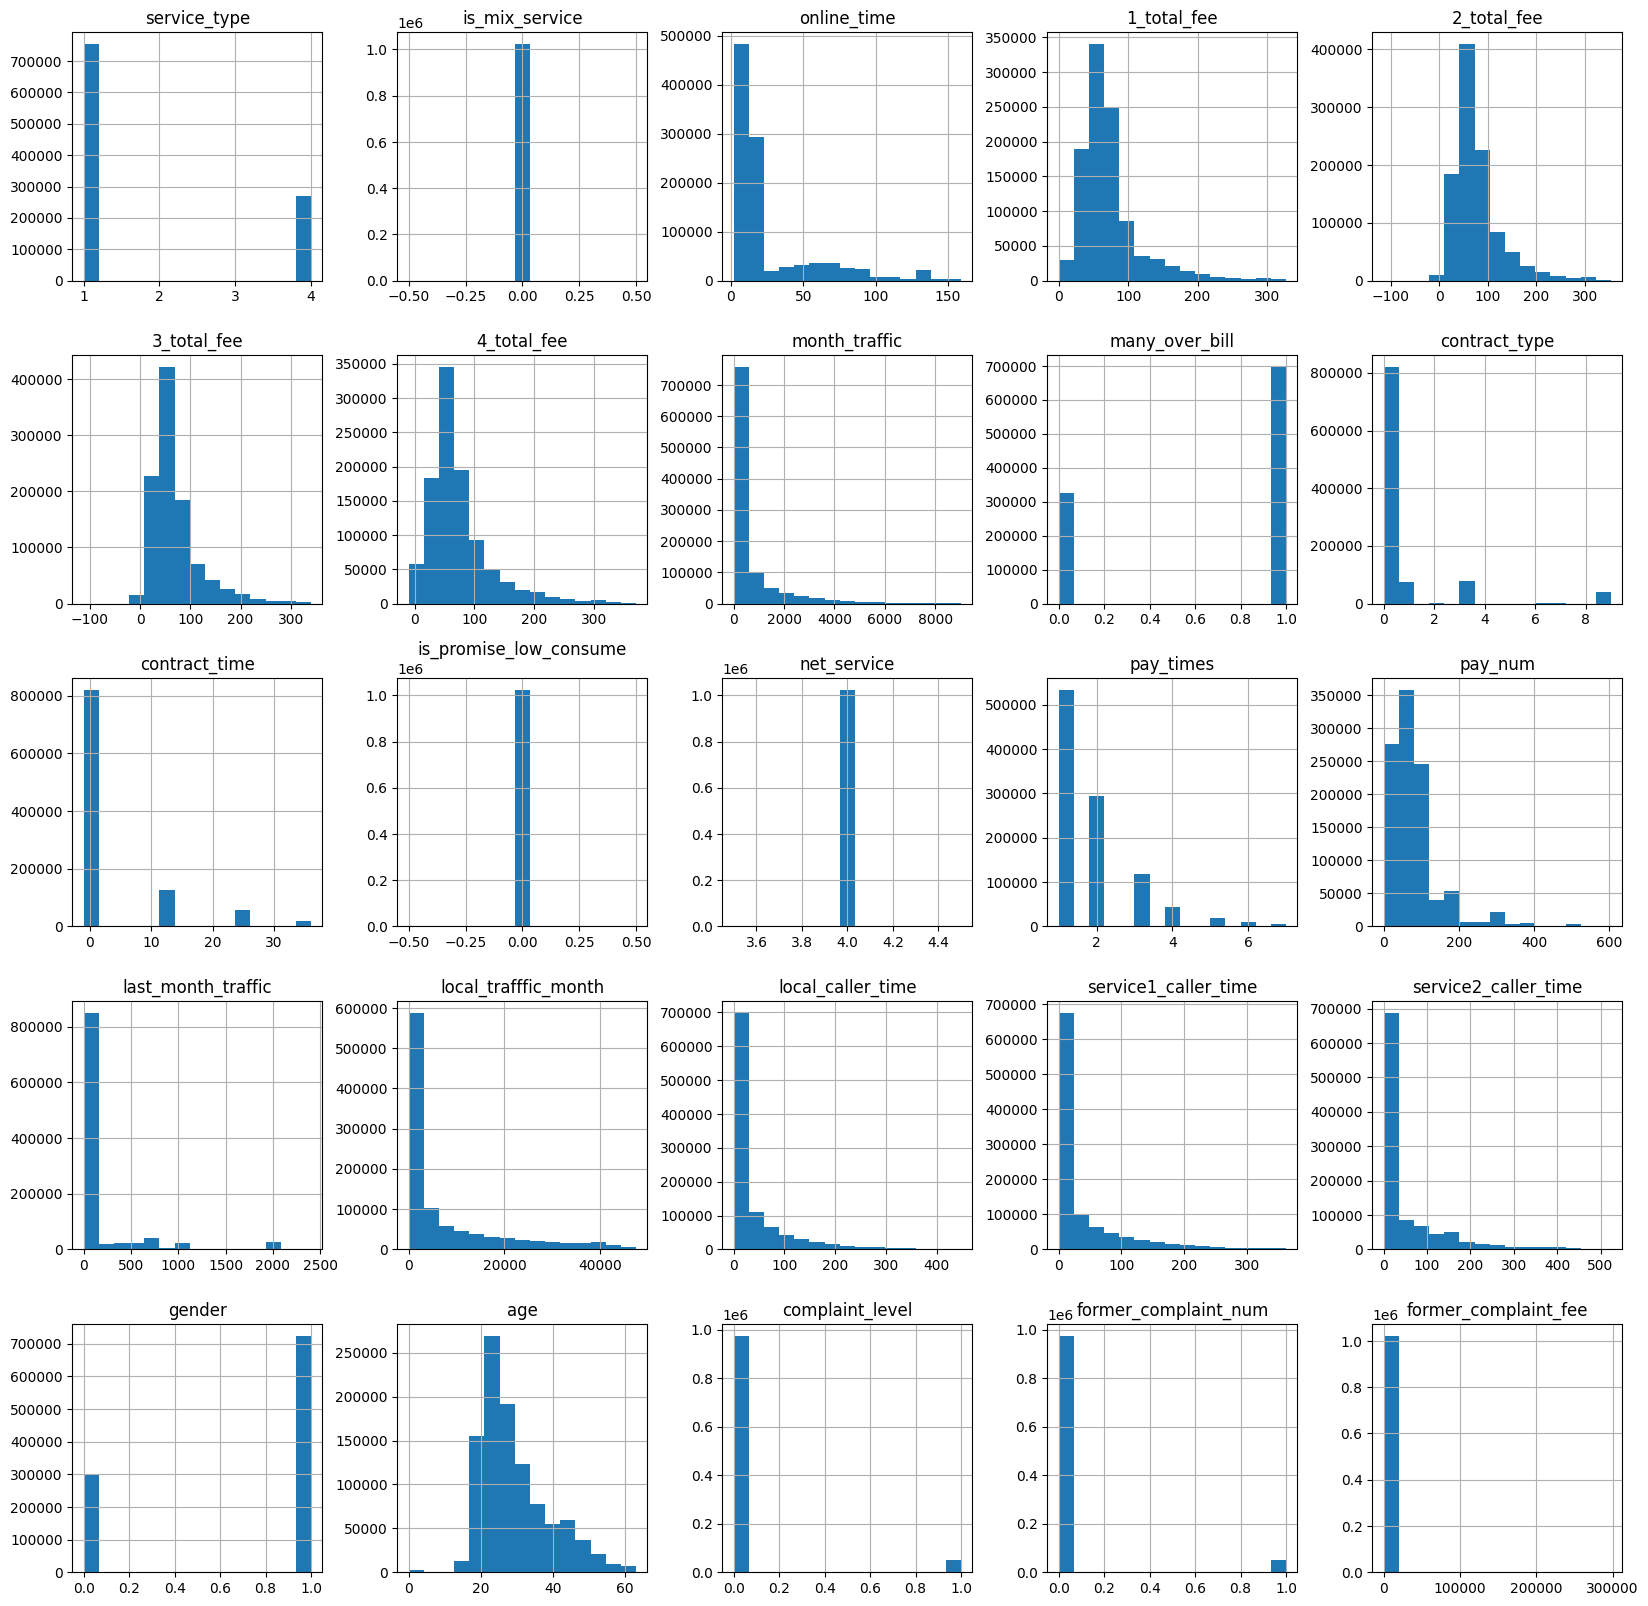

In [ ]:
df.hist( figsize=[20, 20], bins=15)
plt.show()

In [ ]:
df['1_total_fee'] = df['1_total_fee'] + df['2_total_fee'] + df['3_total_fee'] + df['4_total_fee']
df['local_trafffic_month'] = df['local_trafffic_month'] + df['local_caller_time']
df['service1_caller_time'] = df['service1_caller_time'] + df['service2_caller_time']
df.drop(['is_promise_low_consume', 'net_service', 'is_mix_service', 'complaint_level', '2_total_fee', '3_total_fee', '4_total_fee', 'local_caller_time', 'service2_caller_time'], axis=1, inplace=True)

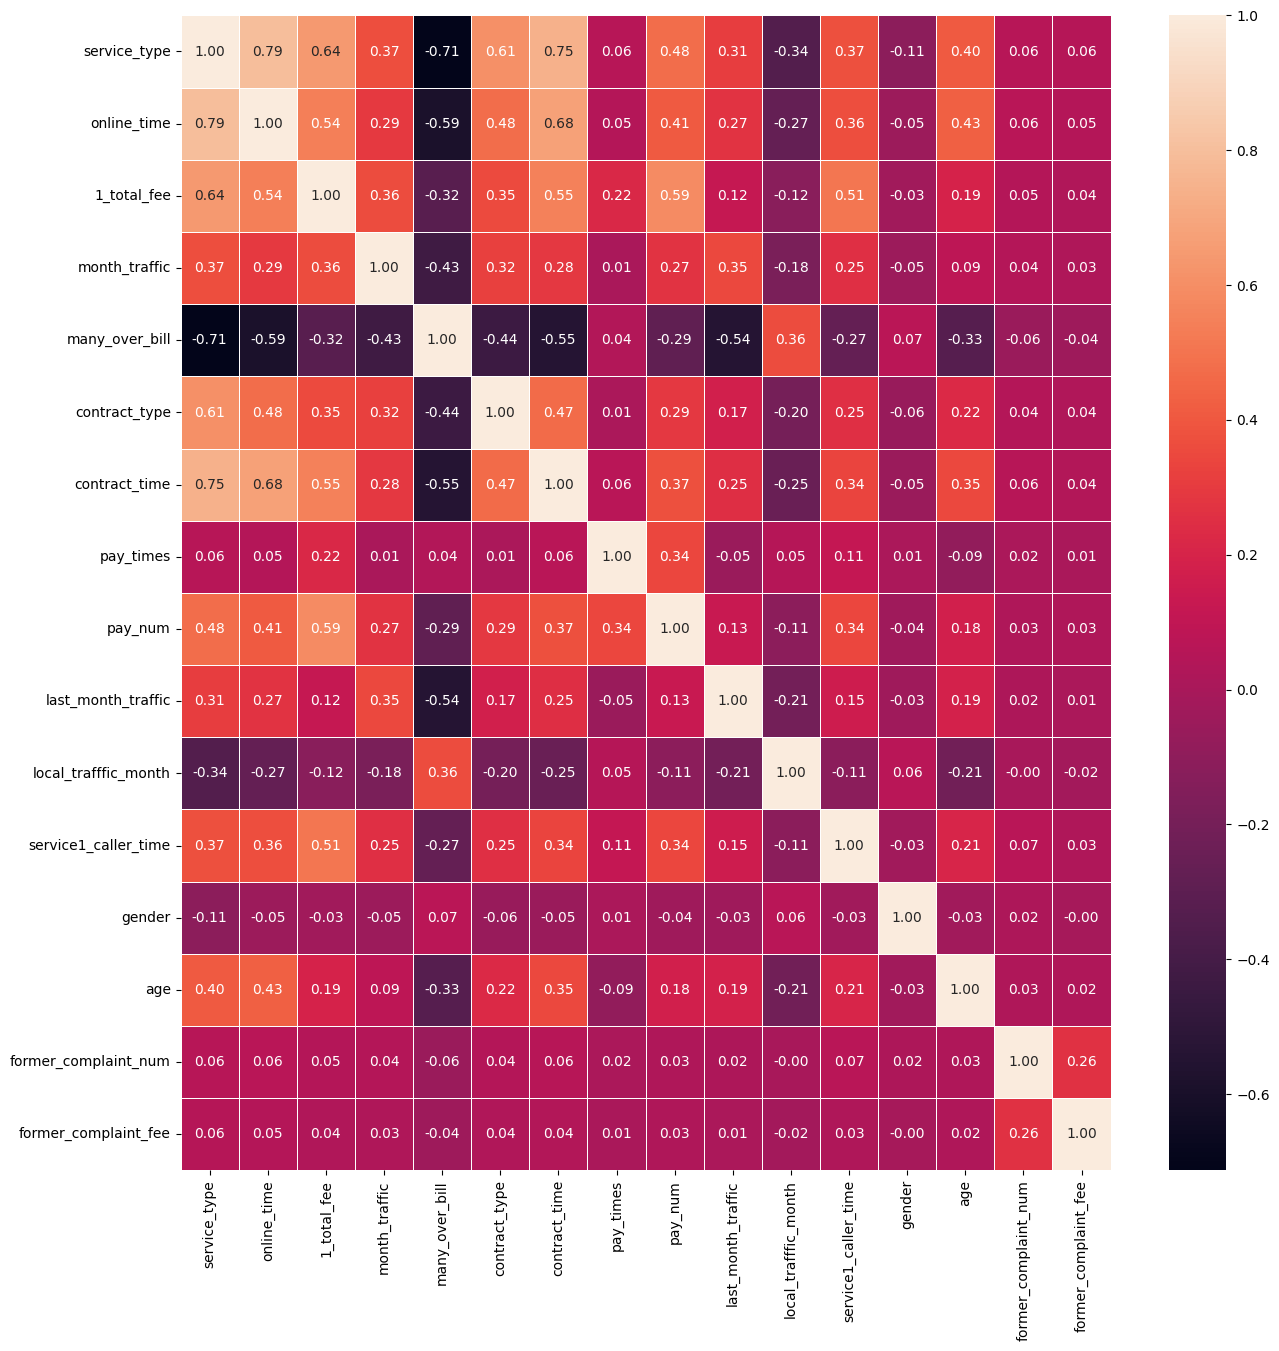

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(method = 'pearson'),annot=True,fmt=".2f", linewidth=.5)
plt.show()

In [ ]:
df

,service_type,online_time,1_total_fee,month_traffic,many_over_bill,contract_type,contract_time,pay_times,pay_num,last_month_traffic,local_trafffic_month,service1_caller_time,gender,age,former_complaint_num,former_complaint_fee
2,1,12.0,245.10,2598.397406,0,0.0,0.0,4.0,50.0,0.000000,1962.908771,98.416667,0,25.0,0.0,0.0
3,4,134.0,333.65,988.440563,0,0.0,0.0,1.0,100.0,37.336425,1078.461075,196.316667,1,44.0,0.0,0.0
5,4,46.0,145.20,218.003452,0,3.0,12.0,1.0,30.0,459.294048,232.636785,14.633333,1,42.0,0.0,0.0
6,1,12.0,150.70,0.000000,0,0.0,0.0,1.0,50.0,0.000000,6.116667,136.033333,1,27.0,0.0,0.0
7,4,109.0,464.00,635.946276,0,9.0,12.0,2.0,200.0,1024.000000,886.861733,310.733333,1,40.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1479202,1,10.0,113.10,0.000000,1,0.0,0.0,1.0,30.0,0.000000,11793.525470,0.000000,1,20.0,0.0,0.0
1479203,4,65.0,816.00,0.000000,0,9.0,12.0,3.0,500.0,0.000000,108.486010,112.050000,1,38.0,0.0,0.0
1479204,1,15.0,180.70,0.000000,1,0.0,0.0,3.0,40.0,0.000000,13657.447073,3.683333,1,17.0,0.0,0.0
1479206,1,16.0,209.70,0.000000,1,0.0,0.0,1.0,100.0,0.000000,2952.639522,177.433333,1,29.0,0.0,0.0


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
scaler = StandardScaler()
features_cols = df.columns.drop('gender')
target_col = 'gender'

# df_std = pd.DataFrame(scaler.fit_transform(df[features_cols]), columns=features_cols)

x_train, x_test, y_train, y_test = train_test_split(df[features_cols], df[target_col], test_size=0.2)

In [ ]:
from sklearn import ensemble
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

rf_model = ensemble.RandomForestClassifier(n_estimators=10)
rf_model.fit(x_train, y_train)
test_predict_rf = rf_model.predict(x_test)
accuracy_score(y_test, test_predict_rf)
# 0.76308

0.7620574064482081

In [ ]:
rf_model = ensemble.RandomForestClassifier(n_estimators=100)
rf_model.fit(x_train, y_train)
test_predict_rf = rf_model.predict(x_test)
print(accuracy_score(y_test, test_predict_rf))
f1_score(y_true=y_test, y_pred=test_predict_rf, average='macro')

0.7950802849799166


0.7004277014901868

Epoch 1/10
60/60 [==============================] - 4s 31ms/step - loss: 21.6917 - accuracy: 0.6974 - val_loss: 0.6037 - val_accuracy: 0.7085
Epoch 2/10
60/60 [==============================] - 1s 21ms/step - loss: 0.6029 - accuracy: 0.7093 - val_loss: 0.6035 - val_accuracy: 0.7085
Epoch 3/10
60/60 [==============================] - 1s 23ms/step - loss: 0.6028 - accuracy: 0.7093 - val_loss: 0.6036 - val_accuracy: 0.7085
Epoch 4/10
60/60 [==============================] - 1s 12ms/step - loss: 0.6028 - accuracy: 0.7093 - val_loss: 0.6035 - val_accuracy: 0.7085
Epoch 5/10
60/60 [==============================] - 1s 10ms/step - loss: 0.6028 - accuracy: 0.7093 - val_loss: 0.6035 - val_accuracy: 0.7085
Epoch 6/10
60/60 [==============================] - 1s 11ms/step - loss: 0.6028 - accuracy: 0.7093 - val_loss: 0.6035 - val_accuracy: 0.7085
Epoch 7/10
60/60 [==============================] - 1s 9ms/step - loss: 0.6028 - accuracy: 0.7093 - val_loss: 0.6035 - val_accuracy: 0.7085
Epoch 8/10
60

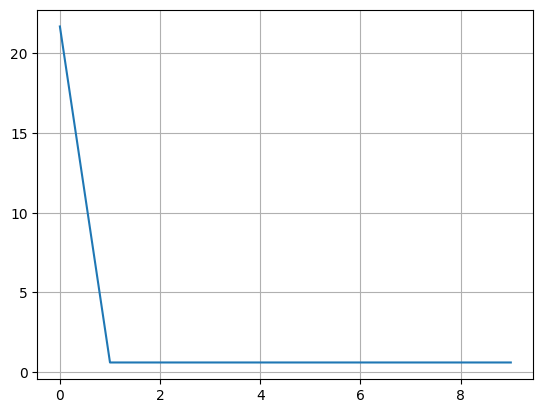

In [ ]:
from tensorflow.keras import models, optimizers
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

nn = models.Sequential()
nn.add(Dense(units=21, activation='selu'))
# nn.add(Dense(units=30, activation='relu'))
nn.add(Dense(units=15, activation='relu'))
nn.add(Dense(units=1, activation='sigmoid'))

adam = optimizers.Adam(learning_rate=0.1)

nn.compile(
    loss='binary_crossentropy',
    optimizer=adam,
    metrics = ["accuracy"])

history = nn.fit(x_train, y_train, epochs=10, verbose=True, batch_size=10000, validation_data=(x_test, y_test))
print("Train-accuracy", history.history["accuracy"])

results = nn.evaluate(x_test, y_test, batch_size=10000)
print("Test-accuracy:", results[1])

plt.plot(history.history['loss'])
plt.grid(True)
plt.show()

In [ ]:
state = pd.Series(y_test.copy())
state.loc[:] = 1
print(accuracy_score(y_test, state))
f1_score(y_true=y_test, y_pred=state)

0.7035083350807297


0.825952325084914

In [ ]:
import lightgbm as lgb
lgb_model = lgb.LGBMClassifier( boosting_type="gbdt", num_leaves=100,
        max_depth=30, n_estimators=100, objective='binary', class_weight='balanced',
        subsample=0.65, colsample_bytree=0.65, subsample_freq=1,
        learning_rate=0.05, random_state=42, n_jobs=-1, metric="None", importance_type='gain')
lgb_model.fit(x_train, y_train)
y_pred=lgb_model.predict(x_test)
accuracy_score(y_true=y_test, y_pred=y_pred)

LightGBMError: Number of classes must be 1 for non-multiclass training

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 4.8 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(
    iterations=100, depth=6, learning_rate=0.1,
   loss_function='Logloss', verbose=False)
model.fit(x_train, y_train)

In [ ]:
y_pred=model.predict(x_test)
print(accuracy_score(y_true=y_test, y_pred=y_pred))
f1_score(y_true=y_test, y_pred=y_pred)

0.7094997889828976


0.8286598206983203